In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('master_table.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,title_id,region,primary_title,start_year,runtime_minutes,genres,directors,writers,nconst,averagerating,numvotes
0,USA,150000000.0,208806270,652270625,1670401444,tt0369610,BG,Jurassic World,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0189777,7.0,539338.0
1,USA,250000000.0,30180188,73078100,284139100,tt0401729,UA,John Carter,2012,132.0,"['Action', 'Adventure', 'Sci-Fi']",nm0004056,"nm0004056,nm0028764,nm0149290,nm0123194",nm0606640,6.6,241792.0
2,USA,200000000.0,116101023,334191110,1025467803,tt1014759,IE,Alice in Wonderland,2010,108.0,"['Adventure', 'Family', 'Fantasy']",nm0000318,"nm0941314,nm0140902",nm0865297,6.5,358813.0
3,Hong Kong,0.0,0,0,2704326,tt10214198,NaN,Gou yan kan ren xin,2019,91.0,['Drama'],nm10633710,nm10633710,nm4454561,NaN,NaN
4,South Korea,0.0,0,0,1424100,tt10308634,NaN,My First Client,2019,114.0,['Drama'],nm1155471,NaN,nm6771561,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13204,France,0.0,0,0,54511,tt2979572,FR,Juliette,2013,81.0,['Drama'],nm4135794,"nm4135794,nm5736471",nm3304939,5.1,115.0
13205,USA,5000000.0,84527,332890,2700051,tt2980592,SI,The Guest,2014,100.0,"['Action', 'Crime', 'Horror']",nm1417392,nm1440023,nm0062373,6.7,82089.0
13206,Japan,0.0,0,0,1713850,tt2983564,XWW,The Garden of Sinners: Future Gospel,2013,90.0,"['Animation', 'Drama', 'Fantasy']",nm2951802,"nm5925700,nm2195555",nm2951803,7.2,502.0
13207,Russia,0.0,0,0,1102806,tt2996932,NaN,Game of Truth,2013,90.0,"['Comedy', 'Drama']",nm1597722,"nm0476544,nm0500977,nm0555728,nm1597722",nm4705838,7.0,605.0


# Adding profit column

In [198]:
df['profit'] = df['Budget'] - df['Cumulative Worldwide Gross']


In [199]:
df['profit'][:10].astype(int)

0   -1520401444
1     -34139100
2    -825467803
3      -2704326
4      -1424100
5       -844496
6    -151144750
7    -134849455
8     -25857747
9      -1034558
Name: profit, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13209 entries, 0 to 13208
Data columns (total 16 columns):
Country                       13202 non-null object
Budget                        13205 non-null float64
Opening Weekend USA           13209 non-null int64
Gross USA                     13209 non-null int64
Cumulative Worldwide Gross    13209 non-null int64
title_id                      13209 non-null object
region                        10883 non-null object
primary_title                 13209 non-null object
start_year                    13209 non-null int64
runtime_minutes               12444 non-null float64
genres                        13209 non-null object
directors                     13173 non-null object
writers                       12253 non-null object
nconst                        13209 non-null object
averagerating                 12866 non-null float64
numvotes                      12866 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 1.6+ 

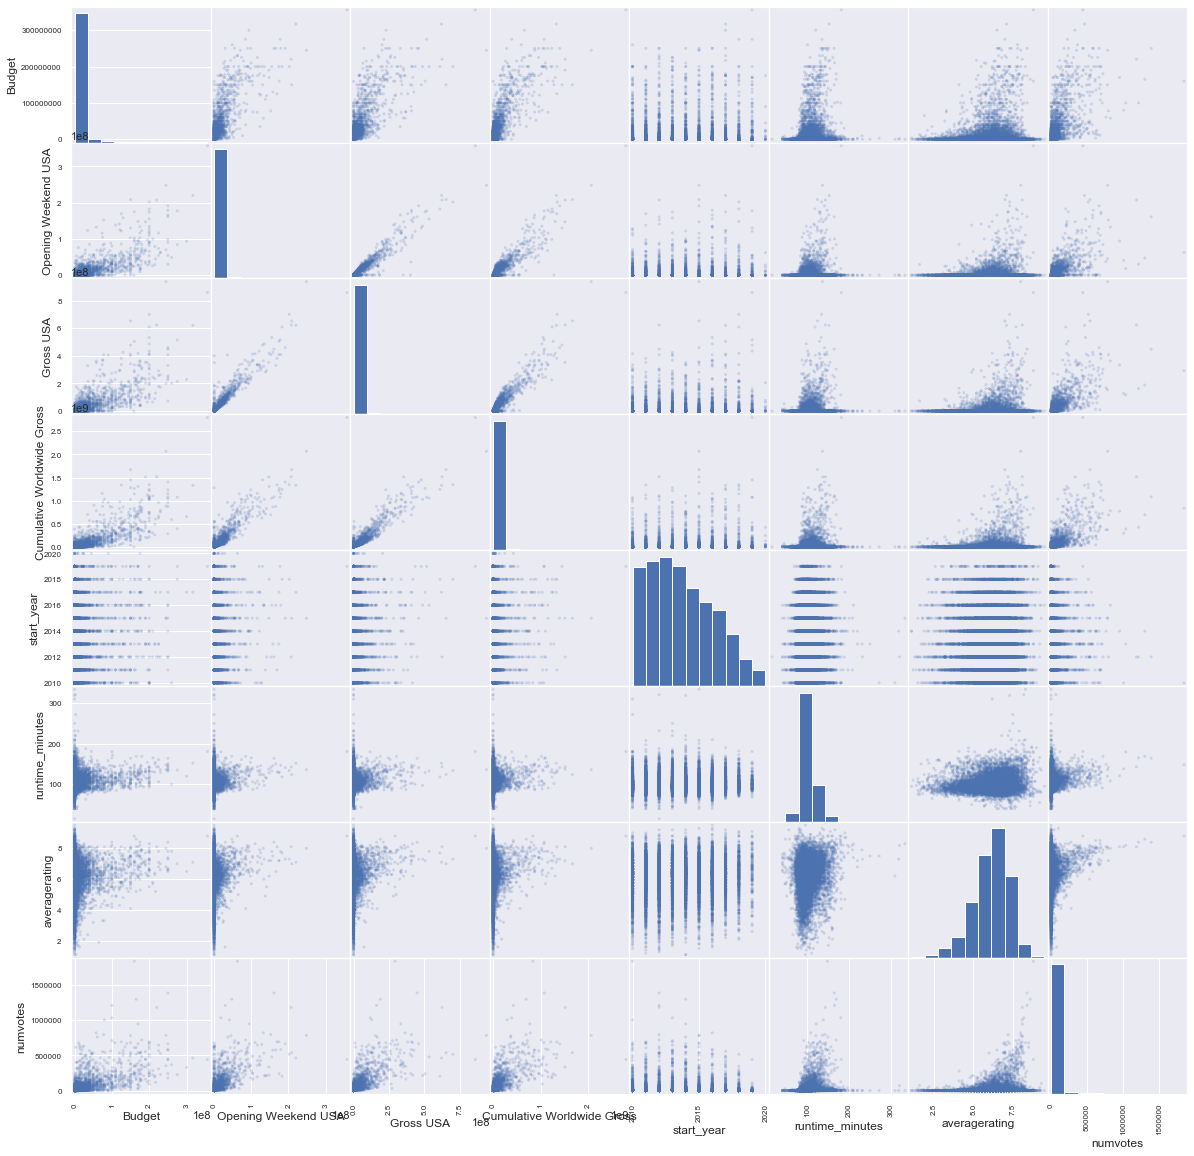

In [124]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20));

In [ ]:
#sns.pairplot(df, hue="Country", diag_kind="hist")

KeyboardInterrupt: 

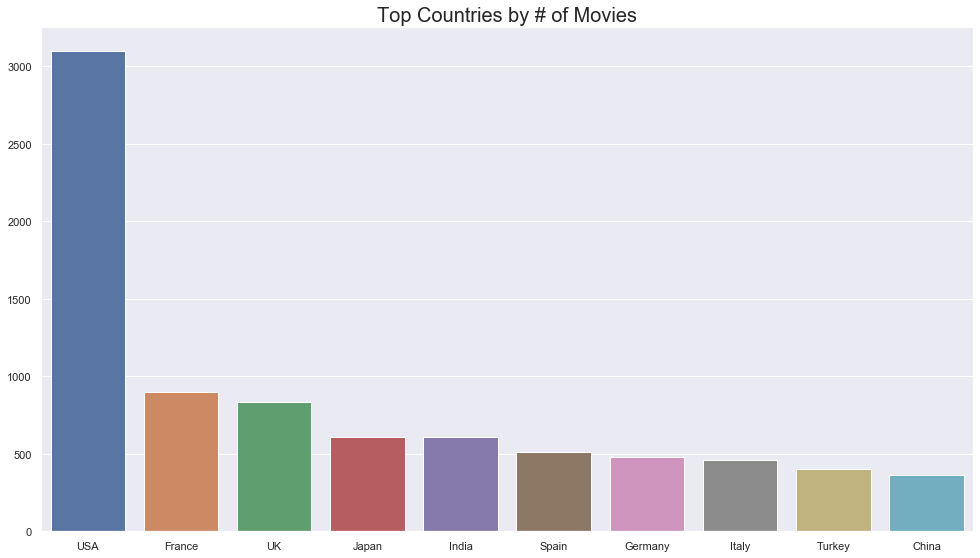

In [45]:
movie_count_by_country = df['Country'].value_counts()
sns.set(style="whitegrid")
y = movie_count_by_country[:10].values
x = movie_count_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})

sns.barplot(x,y).set_title('Top Countries by # of Movies', size=20);

# Total Money Spent on Movies Per Country

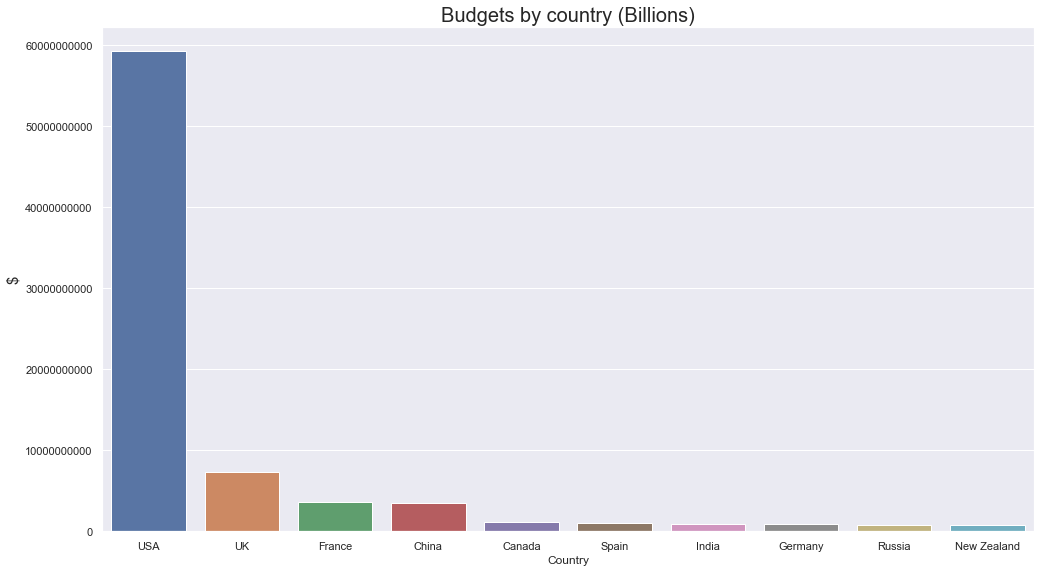

In [136]:
most_money_spent_by_country = df['Budget'].groupby(df['Country']).sum().sort_values(ascending=False)

sns.set(style="whitegrid")
y = most_money_spent_by_country[:10].values
x = most_money_spent_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=15)

sns.barplot(x,y).set_title('Budgets by country (Billions)', size=20);

In [137]:
df.loc[df['Country'] == 'Panama'] #possibly an outlier

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,title_id,region,primary_title,start_year,runtime_minutes,genres,directors,writers,nconst,averagerating,numvotes
4903,Panama,20000000.0,1751388,4712792,4978353,tt1781827,PA,Hands of Stone,2016,111.0,"['Action', 'Biography', 'Drama']",nm1189755,nm1189755,nm1098286,6.6,12851.0


# Top 10 Highest Grossing Movies

In [129]:
highest_grossing = df.groupby(['primary_title']).sum()['Cumulative Worldwide Gross'].sort_values(ascending=False)[:10]
highest_grossing

primary_title
Avengers: Endgame                               2797800564
Star Wars: Episode VII - The Force Awakens      2068224036
Jurassic World                                  1670401444
The Avengers                                    1518815515
Furious 7                                       1515048151
Frozen II                                       1450026933
Avengers: Age of Ultron                         1402809540
Black Panther                                   1347426059
Harry Potter and the Deathly Hallows: Part 2    1342191687
Star Wars: The Last Jedi                        1332540187
Name: Cumulative Worldwide Gross, dtype: int64

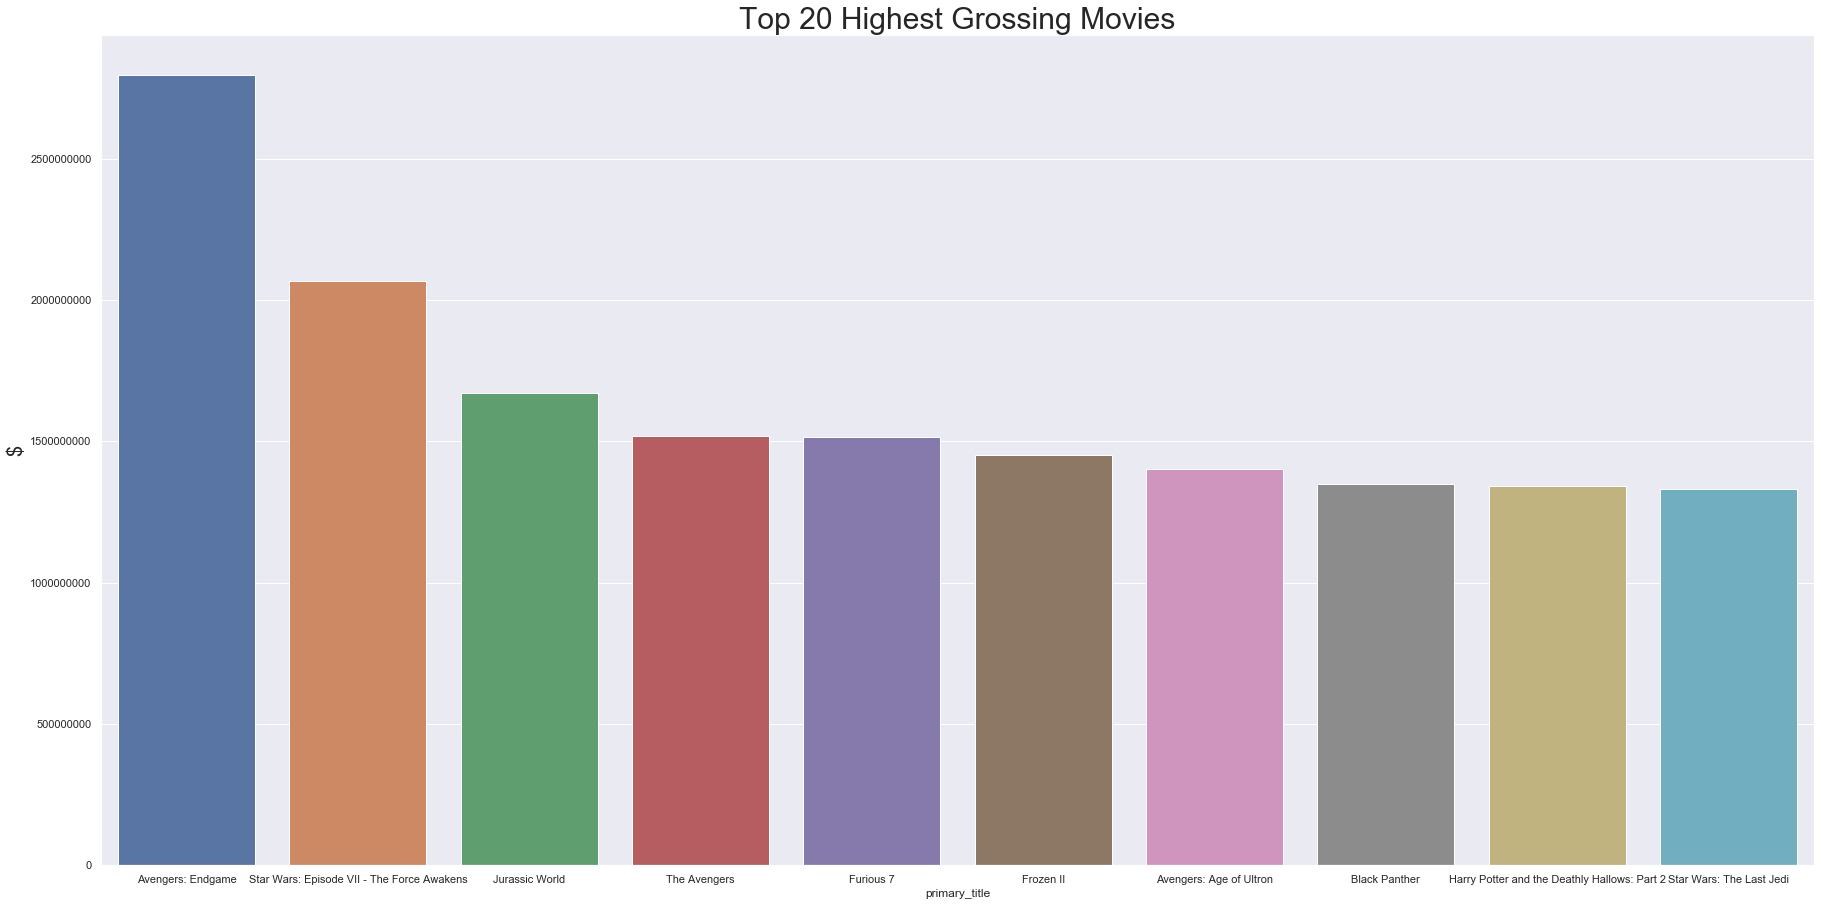

In [186]:
sns.set(style="whitegrid")
y = highest_grossing.values
x = highest_grossing.index
sns.set(rc={'figure.figsize':(30.7,15.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=20)

sns.barplot(x,y).set_title('Top 20 Highest Grossing Movies', size=30);

# Movie Releases by Year

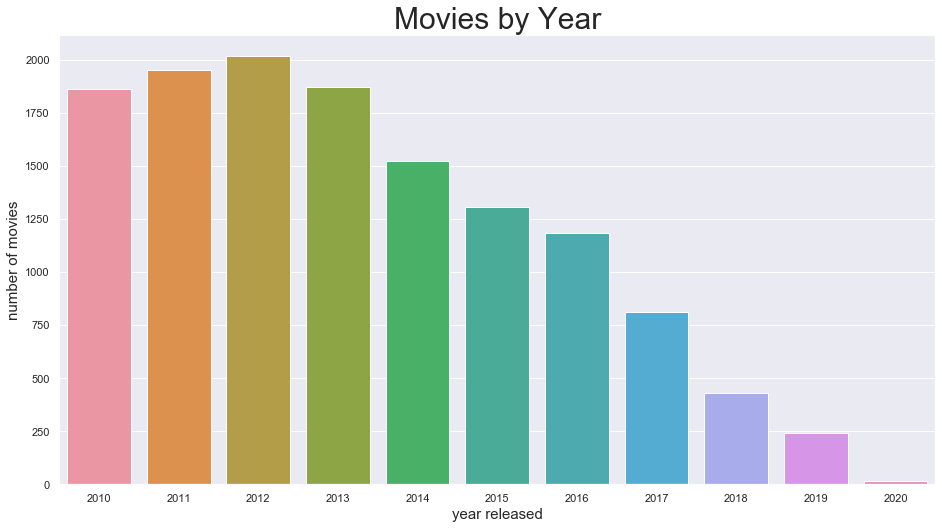

In [189]:
sns.countplot(x="start_year", data=df).set_title('Movies by Year', size=30);
sns.set(rc={'figure.figsize':(15.7,8.27)})
plt.ylabel("number of movies", size=15)
plt.xlabel("year released", size=15);
# sns.set_theme(style="darkgrid")

# More specific plotting..